In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
titanic.value_counts()

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [39]:
print(titanic['Sex'].value_counts())
print(titanic['Survived'].value_counts())
print(titanic['Pclass'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [41]:
titanic.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [45]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

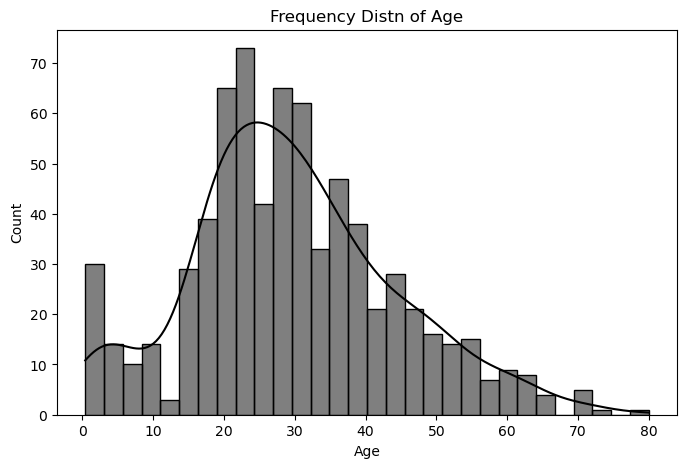

In [65]:
#univariate analysis
plt.figure(figsize=(8,5))
sns.histplot(titanic['Age'].dropna(),kde=True,bins=30,color='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Frequency Distn of Age')
plt.show()

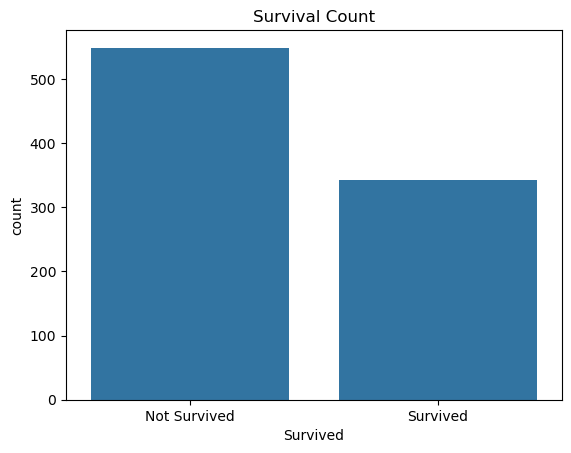

In [69]:
#count of survivors and non-survivors
sns.countplot(x='Survived',data=titanic)
plt.title('Survival Count')
plt.xticks([0,1], ['Not Survived', 'Survived'])
plt.show()

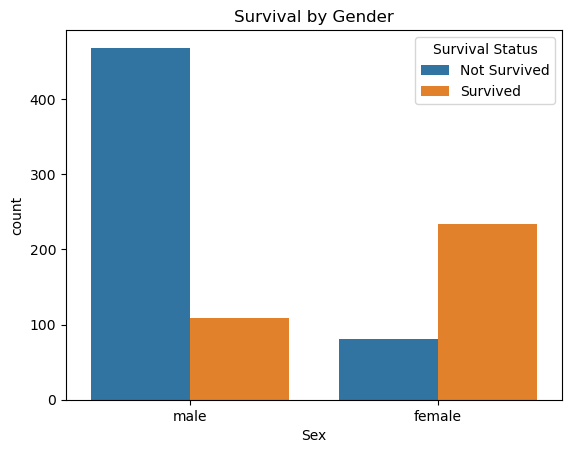

In [79]:
#bivariate analysis 
sns.countplot(x='Sex',hue='Survived',data=titanic)
plt.title('Survival by Gender')
plt.legend(title='Survival Status',labels=['Not Survived', 'Survived'])
plt.show()

Text(0.5, 1.0, 'Age Distn by Passenger Class')

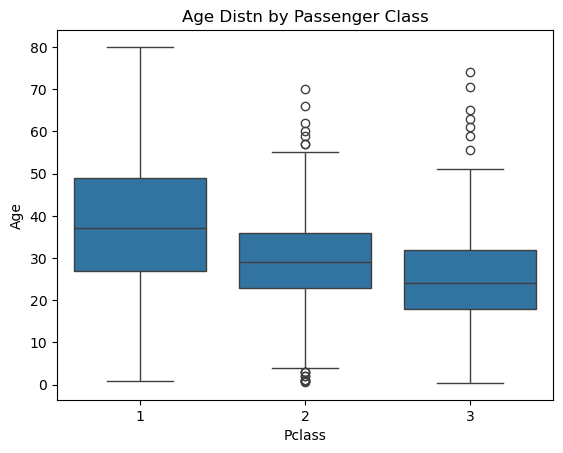

In [81]:
sns.boxplot(x='Pclass',y='Age',data=titanic)
plt.title('Age Distn by Passenger Class')

Text(0.5, 1.0, 'Correlation Heatmap')

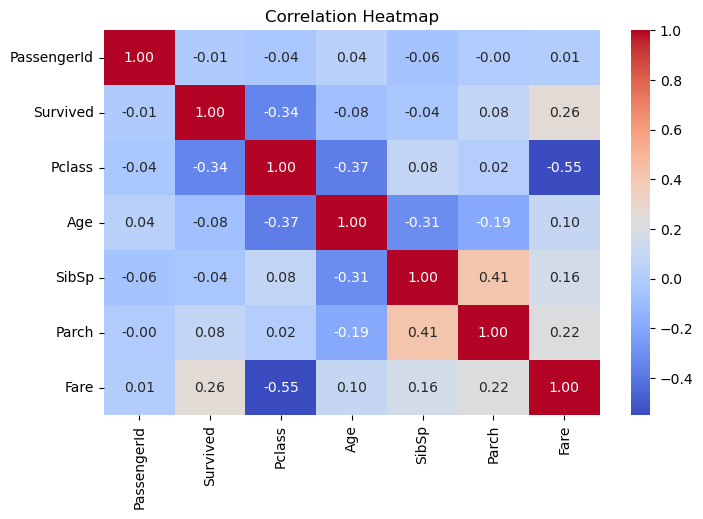

In [87]:
#Multivariate Analysis
numeric_df = titanic.select_dtypes(include=['int64','float64'])
plt.figure(figsize=(8,5))
sns.heatmap(numeric_df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')

In [97]:
titanic['Survival Status'] = titanic['Survived'].map({0:'Not Survived', 1:'Survived'})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Not Survived
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Not Survived


<Figure size 400x400 with 0 Axes>

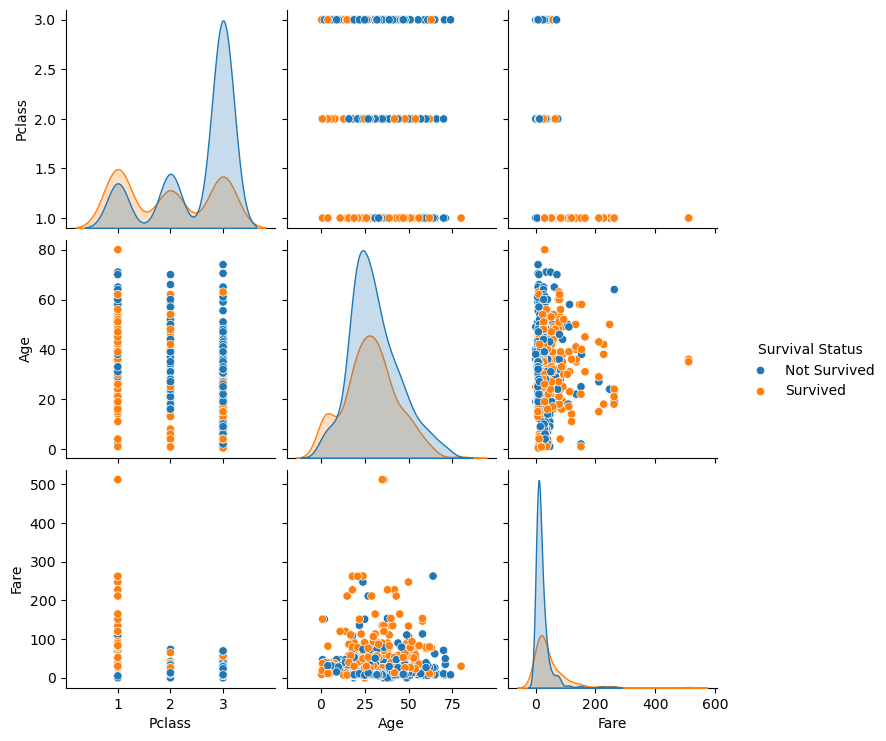

In [141]:
plt.figure(figsize=(4,4))
sns.pairplot(titanic[['Survival Status', 'Pclass', 'Age', 'Fare']],hue='Survival Status')
plt.savefig('pairplot1.png')
plt.show()


Text(0.5, 1.0, 'Fare Distn by Survival')

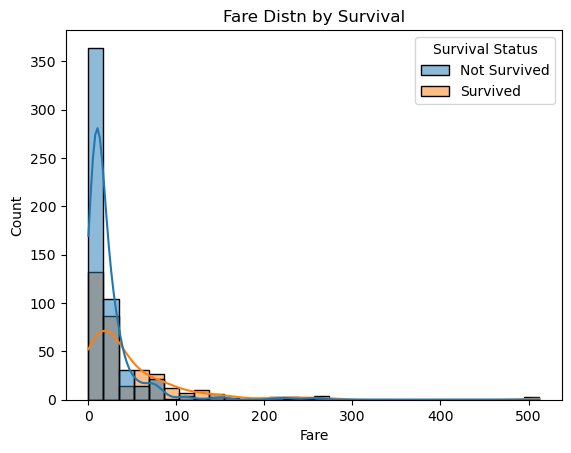

In [103]:
sns.histplot(data=titanic,x='Fare',hue='Survival Status',kde=True,bins=30)
plt.title('Fare Distn by Survival')

In [109]:
titanic['Age Bins'] = pd.cut(titanic['Age'],bins=[0,10,18,30,50,80],
                            labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
titanic['Embarked'] = titanic['Embarked'].map({'S':'Southampton','C':'Cherbourg','Q':'Queenstown'})
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival Status,Age Bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Not Survived,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Survived,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Survived,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Survived,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Not Survived,Adult


Text(0.5, 1.0, 'Survival by Age Group')

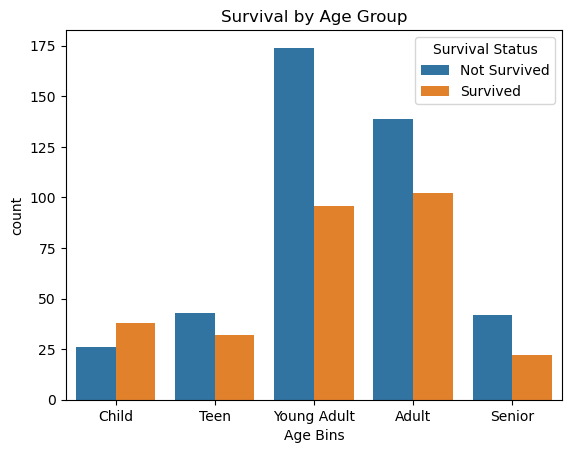

In [111]:
sns.countplot(data=titanic,x='Age Bins', hue = 'Survival Status')
plt.title('Survival by Age Group')

Text(0.5, 1.0, 'Survival by Passenger Class and Gender')

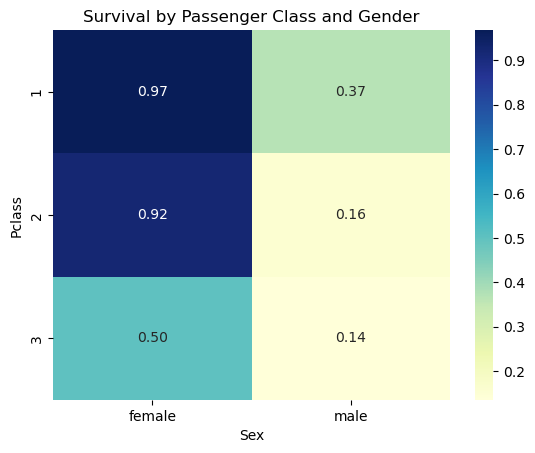

In [119]:
cross = pd.crosstab(titanic['Pclass'],titanic['Sex'],values=titanic['Survived'],aggfunc='mean')
sns.heatmap(cross,annot=True,fmt='.2f',cmap='YlGnBu')
plt.title('Survival by Passenger Class and Gender')

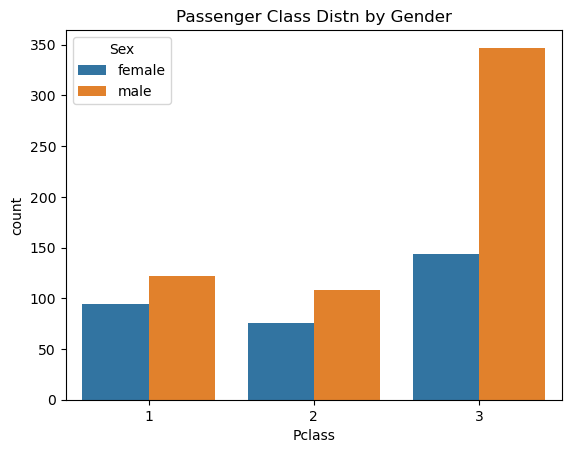

In [121]:
sns.countplot(data=titanic,x='Pclass',hue='Sex')
plt.title('Passenger Class Distn by Gender')
plt.show()

In [123]:
titanic['Sex'] = titanic['Sex'].map({'male': 0, 'female': 1})
titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survival Status,Age Bins
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Not Survived,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Survived,Adult
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Survived,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,Southampton,Survived,Adult
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,Southampton,Not Survived,Adult


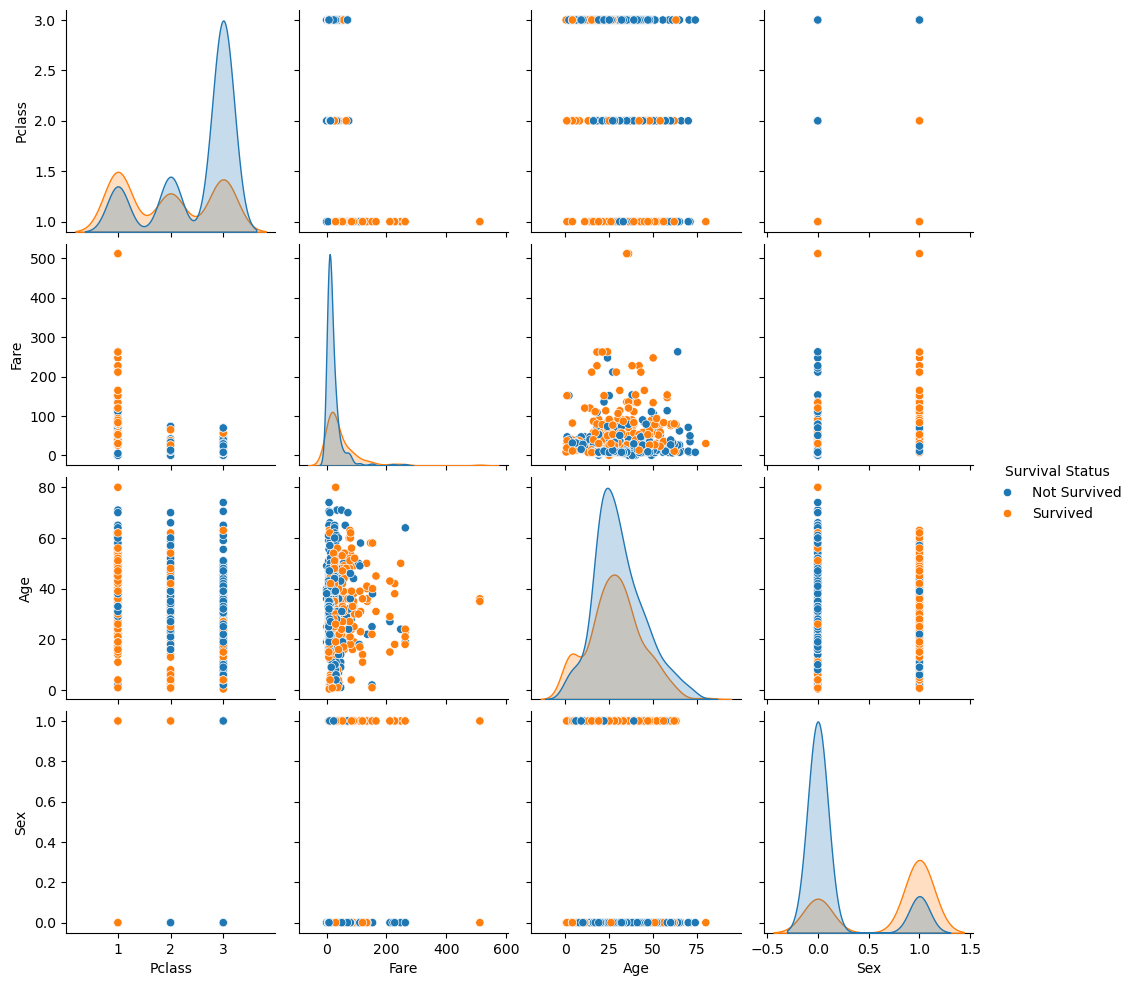

In [143]:
sns.pairplot(titanic[['Pclass', 'Fare', 'Age', 'Sex', 'Survival Status']], hue='Survival Status')
plt.savefig('pairplot2.png')

Text(0.5, 1.0, 'Survival by Embarkment')

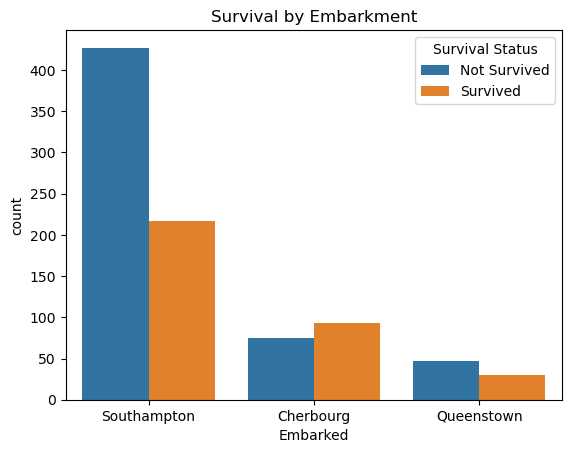

In [145]:
sns.countplot(data=titanic,x='Embarked', hue = 'Survival Status')
plt.title('Survival by Embarkment')
